In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coviddataset/COVID-19.csv


In [4]:
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import display
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from joblib import dump, load

%matplotlib inline

In [5]:
abc = pd.read_csv('../input/coviddataset/COVID-19.csv')

In [6]:
abc.describe()

,day,month,year,cases,deaths,popData2018
count,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8.084000e+03
mean,17.390644,2.346334,2019.991730,105.307332,5.169958,6.818131e+07
std,8.996897,1.237912,0.090566,796.918408,46.178466,2.086066e+08
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,1.000000e+03
25%,10.000000,1.000000,2020.000000,0.000000,0.000000,4.089400e+06
50%,18.000000,3.000000,2020.000000,0.000000,0.000000,1.062716e+07
75%,25.000000,3.000000,2020.000000,8.000000,0.000000,4.672375e+07
max,31.000000,12.000000,2020.000000,24998.000000,971.000000,1.392730e+09


In [7]:
abc.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,4/1/2020,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
1,3/31/2020,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
2,3/30/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
3,3/29/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
4,3/28/2020,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
5,3/27/2020,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
6,3/26/2020,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
7,3/25/2020,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
8,3/24/2020,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
9,3/23/2020,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0


In [8]:
print(abc)

        dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      4/1/2020    1      4  2020     25       0             Afghanistan   
1     3/31/2020   31      3  2020     27       0             Afghanistan   
2     3/30/2020   30      3  2020      8       1             Afghanistan   
3     3/29/2020   29      3  2020     15       1             Afghanistan   
4     3/28/2020   28      3  2020     16       1             Afghanistan   
...         ...  ...    ...   ...    ...     ...                     ...   
8097  3/25/2020   25      3  2020      0       0                Zimbabwe   
8098  3/24/2020   24      3  2020      0       1                Zimbabwe   
8099  3/23/2020   23      3  2020      0       0                Zimbabwe   
8100  3/22/2020   22      3  2020      1       0                Zimbabwe   
8101  3/21/2020   21      3  2020      1       0                Zimbabwe   

     geoId countryterritoryCode  popData2018  
0       AF                  AFG   371723

In [9]:
abc.shape

(8102, 10)

In [10]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8102 entries, 0 to 8101
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  8102 non-null   object 
 1   day                      8102 non-null   int64  
 2   month                    8102 non-null   int64  
 3   year                     8102 non-null   int64  
 4   cases                    8102 non-null   int64  
 5   deaths                   8102 non-null   int64  
 6   countriesAndTerritories  8102 non-null   object 
 7   geoId                    8084 non-null   object 
 8   countryterritoryCode     8031 non-null   object 
 9   popData2018              8084 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 633.1+ KB


In [11]:
abc.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ed557c410>,
      dtype=object)

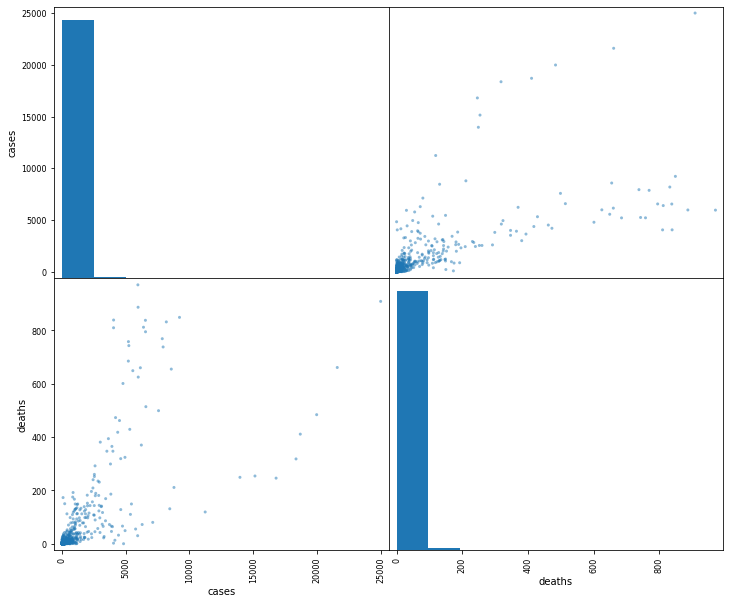

In [12]:
scatter_matrix(abc.loc[:,'cases':'deaths'],figsize=(12, 10))

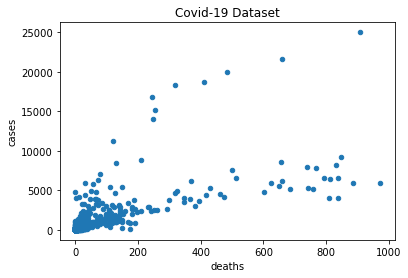

In [13]:
abc.plot.scatter(x='deaths', y='cases', title='Covid-19 Dataset')

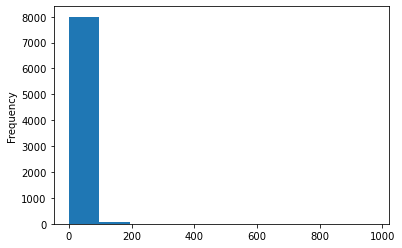

In [14]:
abc['deaths'].plot.hist()

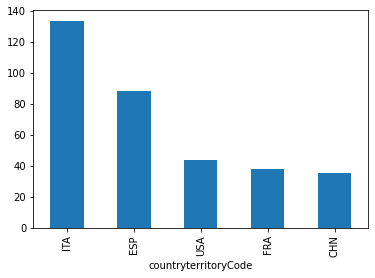

In [15]:
abc.groupby("countryterritoryCode").deaths.mean().sort_values(ascending=False)[:5].plot.bar()

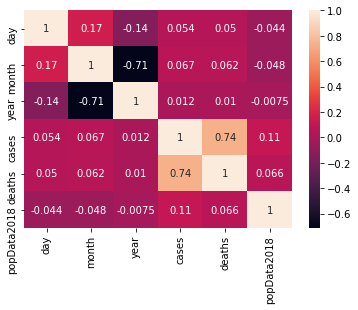

In [16]:
sns.heatmap(abc.corr(), annot=True)

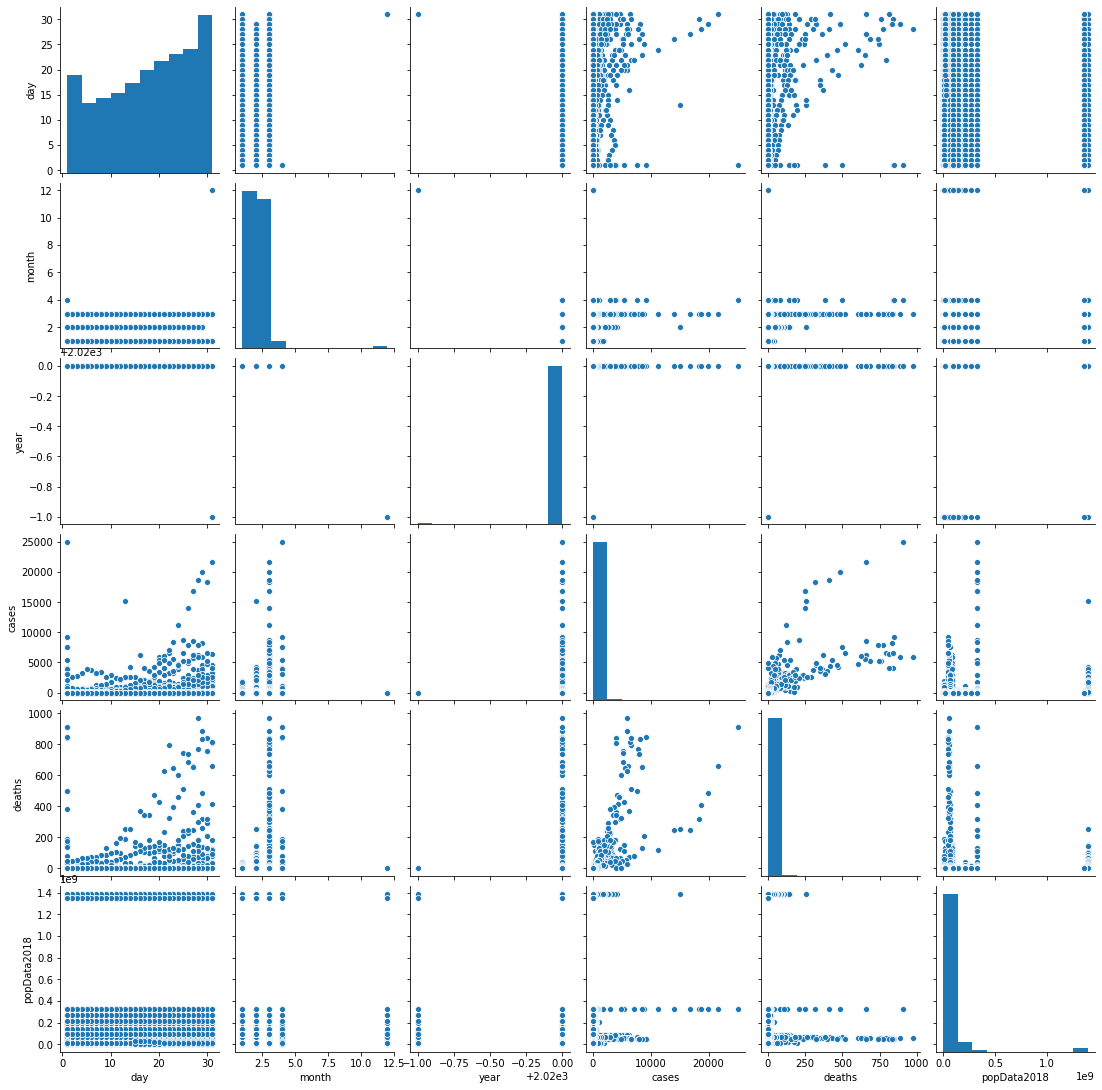

In [17]:
sns.pairplot(abc)